In [1]:
from google.colab import files
uploaded = files.upload()

Saving Twitter.zip to Twitter.zip


In [9]:
import zipfile
import os

with zipfile.ZipFile("Twitter.zip", 'r') as zip_ref:
    zip_ref.extractall("data_folder")


In [4]:
os.listdir("data_folder")

['twitter_training.csv', 'twitter_validation.csv']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
test = pd.read_csv('data_folder/twitter_training.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
import pandas as pd

columns = ['id', 'entity', 'sentiment', 'text']
df = pd.read_csv("data_folder/twitter_training.csv", header=None, names=columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.isna().sum()

,0
id,0
entity,0
sentiment,0
text,686


In [13]:
df=df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73996 non-null  int64 
 1   entity     73996 non-null  object
 2   sentiment  73996 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [51]:
import re

# Function to clean text
def clean_text(text):
    text = str(text)  # Ensure it's string
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers (optional)
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing spaces
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text

# Apply to your dataset
df['clean_text'] = df['text'].apply(clean_text)

# View cleaned sample
df[['text', 'clean_text']].head()

,text,clean_text
1365,Amazing things are possible when all work toge...,amazing things are possible when all work toge...
9943,Stop behaving as if your illiterate developers...,stop behaving as if your illiterate developers...
23402,How do I make a girl keysmash?. Shit this isn'...,how do i make a girl keysmash shit this isnt g...
30993,RhandlerR RhandlerR Wtf?? He's proud of being ...,rhandlerr rhandlerr wtf hes proud of being a f...
11940,@NBA2K Really 2k?? it was an excellent release...,really k it was an excellent release pictwitte...


In [20]:
#Analyze sentiments
df.sentiment.value_counts()

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [28]:
#Entity-wise Sentiment Breakdown
df.groupby('entity')['sentiment'].value_counts()

entity           sentiment 
Amazon           Neutral       1207
                 Negative       575
                 Positive       308
                 Irrelevant     186
ApexLegends      Neutral        936
                               ... 
Xbox(Xseries)    Negative       373
johnson&johnson  Neutral       1013
                 Negative       845
                 Positive       269
                 Irrelevant     197
Name: count, Length: 128, dtype: int64

/tmp/ipython-input-32-2600790133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


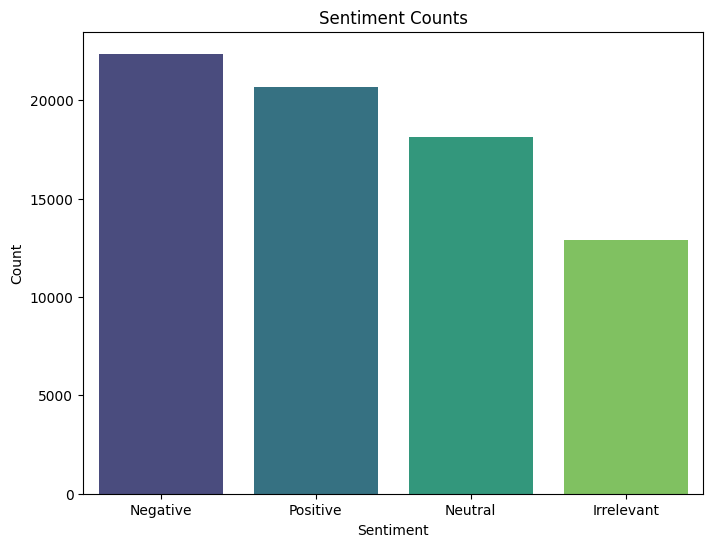

In [32]:
#Show sentiment counts using bar plot
sentiment_counts=df['sentiment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

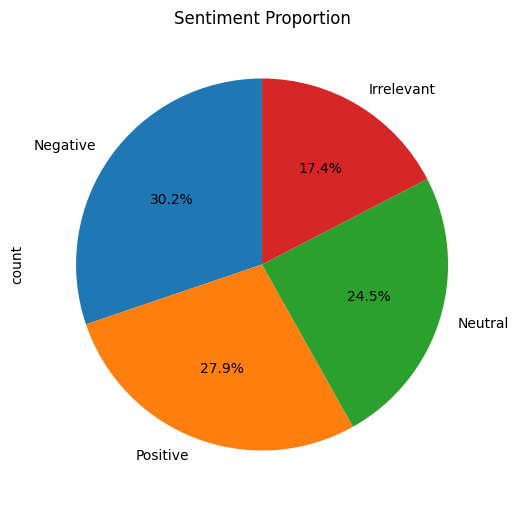

In [42]:
#Show sentiment proportion using Pie Chart
sentiment_prop = df['sentiment'].value_counts()
plt.figure(figsize=(6,9))
sentiment_prop.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Proportion")
plt.show()

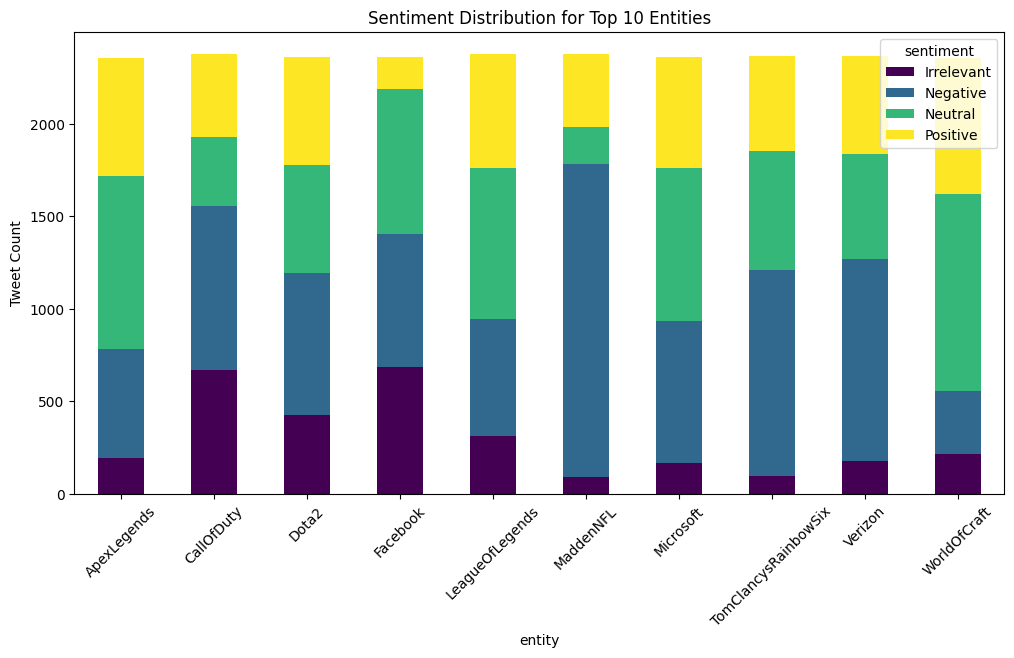

In [50]:
# Step 1: Get top 10 entities
top_entities = df['entity'].value_counts().head(10).index

# Step 2: Filter dataframe
filtered_df = df[df['entity'].isin(top_entities)]

# Step 3: Group by entity and sentiment
sentiment_entity = filtered_df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)

# Step 4: Plot
sentiment_entity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Distribution for Top 10 Entities")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-59-3087408056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.values, y=entity_counts.index, palette='mako')


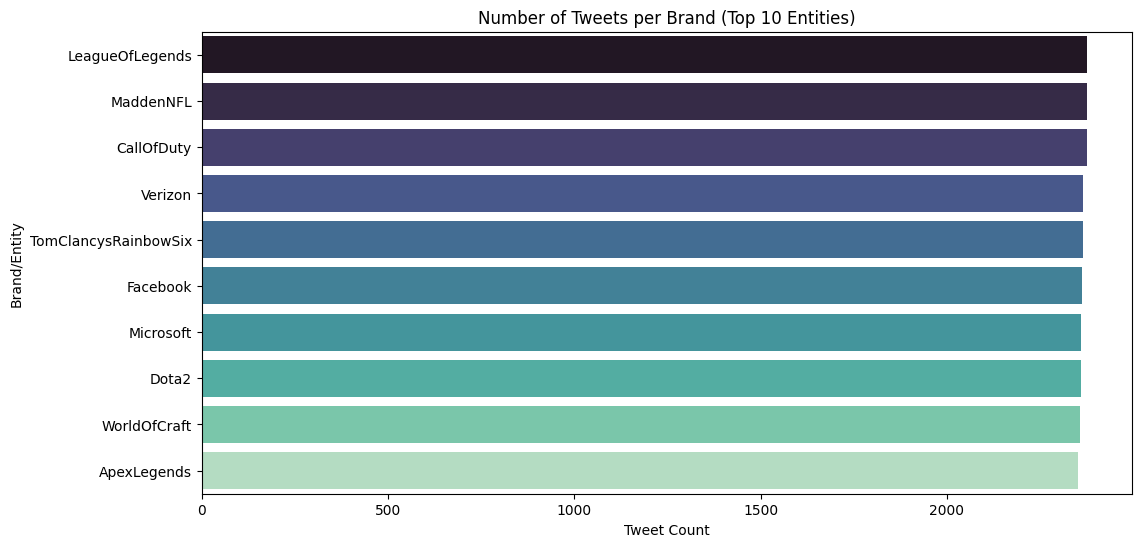

In [59]:
#Number of Tweets per Brand (Entity)
import matplotlib.pyplot as plt
import seaborn as sns

# Count tweets per entity
entity_counts = df['entity'].value_counts().head(10)  # Top 20 brands for visibility

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=entity_counts.values, y=entity_counts.index, palette='mako')
plt.title("Number of Tweets per Brand (Top 10 Entities)")
plt.xlabel("Tweet Count")
plt.ylabel("Brand/Entity")
plt.show()


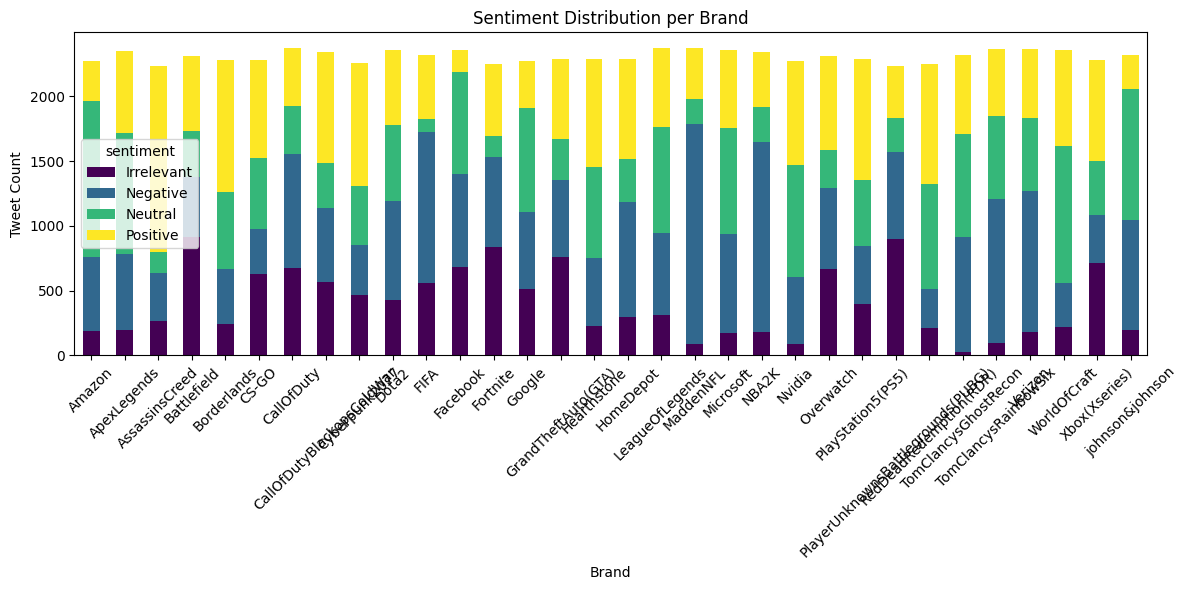

In [91]:
#sentiment distribution per brand
import matplotlib.pyplot as plt

df.groupby(['entity', 'sentiment']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='viridis'
)

plt.title("Sentiment Distribution per Brand")
plt.xlabel("Brand")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


entity
LeagueOfLegends         2377
MaddenNFL               2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64


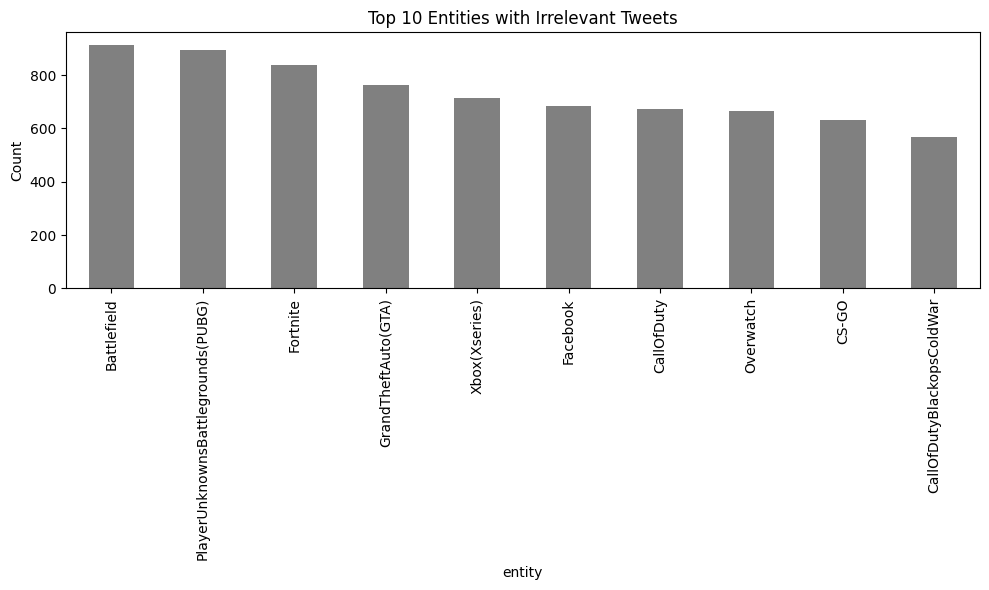

In [89]:
#Irrelevant Tweets Filtering

df_filtered=df[df['sentiment'] =='Irrelevant']
irrelevant_counts=df_filtered['entity'].value_counts().head(10)
print(entity_counts)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
irrelevant_counts.plot(kind='bar', color='grey')
plt.title("Top 10 Entities with Irrelevant Tweets")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()